In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
from sklearn.metrics import confusion_matrix

import pickle as pkl

(60000, 2) (140000, 2)
0.3 0.7


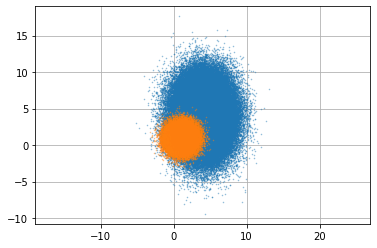

[[1 1]
 [4 4]] [[[1 0]
  [0 1]]

 [[4 0]
  [0 8]]] [0.3 0.7] [2.57799777 2.93655184]


In [2]:
mean1 = [1,1]
cov1 = [[1,0],[0,1]]
mean2 = [4,4]
cov2 = [[4,0],[0,8]]
try:
    with open('q2.pickle', 'rb') as handle:
        b = pkl.load(handle)
        X,y=b
except:
    data1 = np.random.multivariate_normal(mean1, cov1, 60000)
    y1 = np.zeros(60000)
    data2 = np.random.multivariate_normal(mean2, cov2, 140000)
    y2 = np.ones(140000)
    X =np.vstack((data1,data2))
    y =np.hstack((y1,y2))
    with open('q2.pickle', 'wb') as handle:
        pkl.dump([X,y], handle, protocol=pkl.HIGHEST_PROTOCOL)

# sort data into classes
Xy0 = X[y == 0]
Xy1 = X[y == 1]
print(Xy0.shape, Xy1.shape)
# calculate priors
prior1 = len(Xy0) / len(X)
prior2 = len(Xy1) / len(X)
print(prior1, prior2)
### code for plotting
plt.plot(Xy1[:, 0], Xy1[:, 1], '.', alpha=0.5, markersize=1)
plt.plot(Xy0[:, 0], Xy0[:, 1], '.', alpha=0.5, markersize=1)
plt.axis('equal')
plt.grid()
plt.show()

mus=np.array([mean1,mean2])
sigmas=np.array([cov1,cov2])
priors=np.array([prior1,prior2])
print(mus,sigmas,priors,X[100])

In [3]:
class multi_case_3():
    def __init__ (self,mus,sigmas,priors):
        self.mus=mus
        self.sigmas=sigmas
        self.priors=priors
        values=self.calculate_case_3_constants()
        print(f"Paramter Values calculated: {self.W12}\n{self.W22}\n{self.w11}\n{self.w21}\n{self.w10}\n{self.w20}")
        
        return None
    
    def calculate_case_3_constants(self):
        dimension=len(self.mus[0])
        print(self.sigmas.shape)
        if (dimension,dimension) != self.sigmas[0].shape:
            return NameError("Dimension mismatch")
        mu1=self.mus[0]
        mu2=self.mus[1]
        sigma1=self.sigmas[0]
        sigma2=self.sigmas[1]
        sigma1_inv=np.linalg.inv(sigma1)
        sigma2_inv=np.linalg.inv(sigma2)
        prior1=self.priors[0]
        prior2=self.priors[1]
        self.W12=-1/2*sigma1_inv
        self.W22=-1/2*sigma2_inv
        self.w11=np.matmul(sigma1_inv,mu1)
        self.w21=np.matmul(sigma2_inv,mu2)
        self.w10=-1/2*np.matmul(np.matmul(mu1.T,sigma1_inv),mu1) - 1/2*np.log(np.linalg.det(sigma1)) + np.log(priors[0])
        self.w20=-1/2*np.matmul(np.matmul(mu2.T,sigma2_inv),mu2) - 1/2*np.log(np.linalg.det(sigma2)) + np.log(priors[1])
        return self.W12,self.W22,self.w11,self.w21,self.w10,self.w20
    
    def decision_boundry_fn(self,x):
        return np.matmul(np.matmul(x.T,(self.W12-self.W22)), x) + np.matmul((self.w11.T-self.w21.T),x) + (self.w10-self.w20) 
    
    def predict(self,X):
        op_data=[np.matmul(np.matmul(x.T,(self.W12-self.W22)), x) + np.matmul((self.w11.T-self.w21.T),x) + (self.w10-self.w20) for x in X]
        to_ret=[0 if x>0 else 1 for x in op_data]
        return np.array(to_ret)
        

In [4]:
# mus=np.array([[3,6],[3,-2]])
# sigmas=np.array([[[0.5,0],[0,2]],[[2,0],[0,2]]])
# print(sigmas.shape)
# priors=[0.5,0.5]
model3=multi_case_3(mus,sigmas,priors)

(2, 2, 2)
Paramter Values calculated: [[-0.5 -0. ]
 [-0.  -0.5]]
[[-0.125  -0.    ]
 [-0.     -0.0625]]
[1. 1.]
[1.  0.5]
-2.203972804325936
-5.089542895338595


shape of x_in, (1000000, 2)
(1000000,)
doing binary classifcation...
(1000, 1000) (1000, 1000) (1000, 1000)


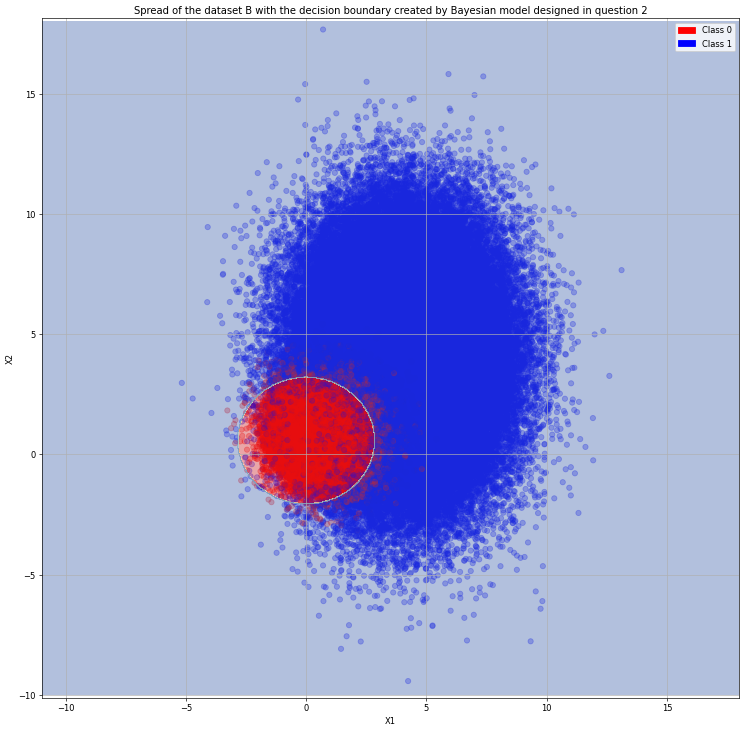

In [5]:
def plot_decision_boundary(model, X, y):
    # Define the axis boundaries of the plot and create a meshgrid
    
    x_min, x_max = -11,18
    y_min, y_max = -10,18
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000),
                         np.linspace(y_min, y_max, 1000))
    
    # Create X values (we're going to predict on all of these)
    x_in = np.c_[xx.ravel(), yy.ravel()] 
    
    # Make predictions using the trained model
    print(f"shape of x_in, {x_in.shape}")
    y_pred = model.predict(x_in)
    print(y_pred.shape)
    y_pred=[[x] for x in y_pred]
    # Check for multi-class
    if len(y_pred[0]) > 1:
        print("doing multiclass classification...")
        # We have to reshape our predictions to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classifcation...")
        y_pred = np.round(y_pred).reshape(xx.shape)
        
    # Plot decision boundary
    plt.figure(figsize=(15,15), dpi=60)
    p=np.concatenate((X.T,np.array([y])),axis=0).T
    np.random.shuffle(p)
    color= ['red' if l == 0 else 'blue' for l in p[:,2]]
    plt.scatter(p[:, 0], p[:, 1], s=40, color=color, alpha=0.3)
    print(xx.shape,yy.shape,y_pred.shape)
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.4)
#     plt.scatter([1],[1], s=20, color=["green"], alpha=1)
#     plt.scatter([4],[4], s=20, color=["yellow"], alpha=1)
    plt.axis('equal')
    plt.title("Spread of the dataset B with the decision boundary created by Bayesian model designed in question 2")
    plt.xlabel("X1")
    plt.ylabel("X2")
    red_patch = mpatches.Patch(color='red', label='Class 0')
    blue_patch = mpatches.Patch(color='blue', label='Class 1')
    plt.legend(handles=[red_patch, blue_patch])
    plt.grid()
    
plot_decision_boundary(model3,X,y)

In [6]:
def b_error(mean1, mean2, sigma1, sigma2, beta, prior1, prior2):
    mu1 = np.array(mean1)
    mu2 = np.array(mean2)
    cov1 = np.array(sigma1)
    cov2 = np.array(sigma2)   
    a = mu1 - mu2
    b = (1-beta)*cov1 + beta*cov2
    inv_b = np.linalg.inv(b)
    det_b = np.linalg.det(b)
    det_cov1 = np.linalg.det(cov1) 
    det_cov2 = np.linalg.det(cov2)    
    k_beta = (beta*(1-beta))/2*np.matmul(np.matmul(a.T, inv_b), a) + 0.5*np.log(det_b/(np.power(det_cov1,1-beta)*np.power(det_cov2,beta)))    
    result = np.power(prior1,beta) * np.power(prior2,1-beta) * np.exp(-k_beta)    
    print(result)
    return result
    

b_error(mean1, mean2, cov1, cov2, 0.5, prior1, prior2)

0.16136700681940294


0.16136700681940294

In [7]:
y_true=y
y_pred=model3.predict(X)
print(y_pred.shape)

def misclf_rate(y_true, y_pred):
    y_true=list(y_true)
    y_pred=list(y_pred)
    total_class1 = y_true.count(0)
    total_class2 = y_true.count(1)
    misclf_class1 = 0
    misclf_class2 = 0    
    tn, fp, fn, tp = confusion_matrix(y_true,y_pred).ravel()    
    total_misclassification_rate = (fp+fn)/(tn+fp+fn+tp)   
    for i in range(len(y_true)):
        if y_true[i] != y_pred[i]:
            if y_true[i] == 0:
                misclf_class1 += 1
            elif y_true[i] == 1:
                misclf_class2 += 1   
            
    class1_misclf_rate = misclf_class1/total_class1
    class2_misclf_rate = misclf_class2/total_class2    
    return class1_misclf_rate,class2_misclf_rate,total_misclassification_rate

c1_mis,c2_mis,tot_mis=misclf_rate(y_true,y_pred)

(200000,)


In [8]:
c1_mis,c2_mis,tot_mis

(0.08378333333333333, 0.07398571428571428, 0.076925)